In [1]:
from IPython.display import display, Math
from sympy import Symbol, Rational, Heaviside, log, exp, cos, sin, simplify, diff, factorial, collect, nsolve, solve, solveset, re, im, Integral, integrate, abc
from sympy.matrices import Matrix
from sympy.plotting import (plot, plot_parametric,
                            plot3d_parametric_surface, plot3d_parametric_line,
                            plot3d)
from sympy.utilities.lambdify import lambdify
from sympy import init_printing
from sympy import pi
import numpy
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
init_printing()


In [2]:
a0 = Symbol('{a_{0}}')
a1 = Symbol('{a_{1}}')
a2 = Symbol('{a_{2}}')
a3 = Symbol('{a_{3}}')

k = Symbol('{k}')


In [3]:
a2 = Rational(1,4) - Rational(1,2)*a0
a3 = Rational(1,4) - a1


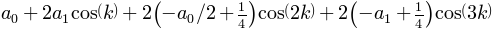

In [4]:
G_t = a0 + 2*( a1*cos(k) + a2*cos(2*k) + a3*cos(3*k) )
G_t


In [5]:
# e = G_t - (1 - Heaviside(k - pi*Rational(1,4)))
# e = integrate(e*e, (k, 0, pi))
# e

In [6]:
# deda0 = diff(e, a0)
# deda1 = diff(e, a1)

# system = (deda0, deda1)

# display(system)

# S_solution = solve(system)
# display(S_solution)


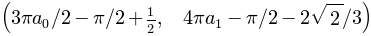

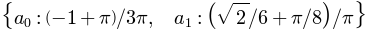

In [7]:
dG_tda0 = simplify(diff(G_t, a0))
dG_tda1 = simplify(diff(G_t, a1))

system2 = ( simplify(integrate(G_t*dG_tda0, (k, 0, pi)) - integrate(dG_tda0, (k, 0, Rational(1,4)*pi))),
            simplify(integrate(G_t*dG_tda1, (k, 0, pi)) - integrate(dG_tda1, (k, 0, Rational(1,4)*pi))))

display(system2)

S_solution = solve(system2)
display(S_solution)


In [8]:
a = 0.04997364
b = 0.13638498
c = 0.20002636
d = 0.22723004
e = 0.20002636
f = 0.13638498
g = 0.04997364


/farmshare/user_data/wongml/venv/lib/python2.7/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


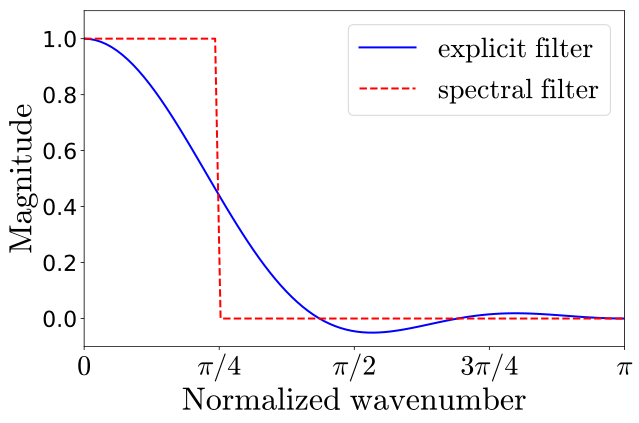

In [9]:
import matplotlib.pyplot as plt

k = numpy.linspace(0, numpy.pi, 100)
TF = (a*numpy.exp(-3*1j*k) + b*numpy.exp(-2*1j*k) + c*numpy.exp(-1j*k)  + d + \
      e*numpy.exp(1j*k) + f*numpy.exp(2*1j*k) + g*numpy.exp(3*1j*k))

TF_spectral = numpy.zeros(100)
TF_spectral[k < 0.25*numpy.pi] = 1.0

plt.figure(figsize=(9, 6), dpi=150)
plt.plot(k, TF, color='b', linewidth=2, label=r'$\mathrm{explicit\ filter}$')
plt.plot(k, TF_spectral, color='r', linewidth=2, linestyle='--', label=r'$\mathrm{spectral\ filter}$')
plt.xlabel(r'$\mathrm{Normalized\ wavenumber}$', fontsize=32)
plt.ylabel(r'$\mathrm{Magnitude}$', fontsize=32)
labels = ['$0$','$\pi / 4$', '$\pi / 2$', '$3 \pi / 4$', '$\pi$']
plt.xticks([0, numpy.pi/4, numpy.pi/2, 3*numpy.pi/4, numpy.pi], labels, fontsize=28)
plt.yticks(fontsize=22)
plt.xlim([0, numpy.pi])
plt.ylim([-0.1, 1.1])
plt.legend(fontsize=28)
plt.tight_layout()
plt.savefig('transfer_function.pdf')
plt.show()
